In [1]:
import requests as req
import pandas as pd

url = "http://10.48.104.39:8854/songs"
response = req.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data['songs'])
df['artists'] = df['artists'].apply(lambda x: ', '.join(x))
df.sample(5)

,track_name,popularity,view_count,like_count,listeners,play_count,album,artists,release_year,release_month,release_day
2070,Sad Machine,53,31060804,395876,241893,2193113,Worlds,Porter Robinson,2014,8.0,8.0
1122,Stairway to Heaven - Remaster,75,57265280,565250,731145,5855847,Led Zeppelin IV (Deluxe Edition),Led Zeppelin,1971,11.0,8.0
1566,To Zion (feat. Carlos Santana),58,16129258,153842,5047,23219,The Miseducation of Lauryn Hill,"Ms. Lauryn Hill, Carlos Santana",1998,8.0,25.0
4745,LET'S GET FKD UP,72,20959342,152060,2080,11138,LET'S GET FKD UP (feat. Tribbs),"Alok, Mondello'G, CERES, Tribbs",2023,11.0,17.0
4575,Murder On The Dancefloor,77,163482031,1073103,1102661,10070487,Read My Lips (Deluxe Version),Sophie Ellis-Bextor,2002,6.0,6.0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

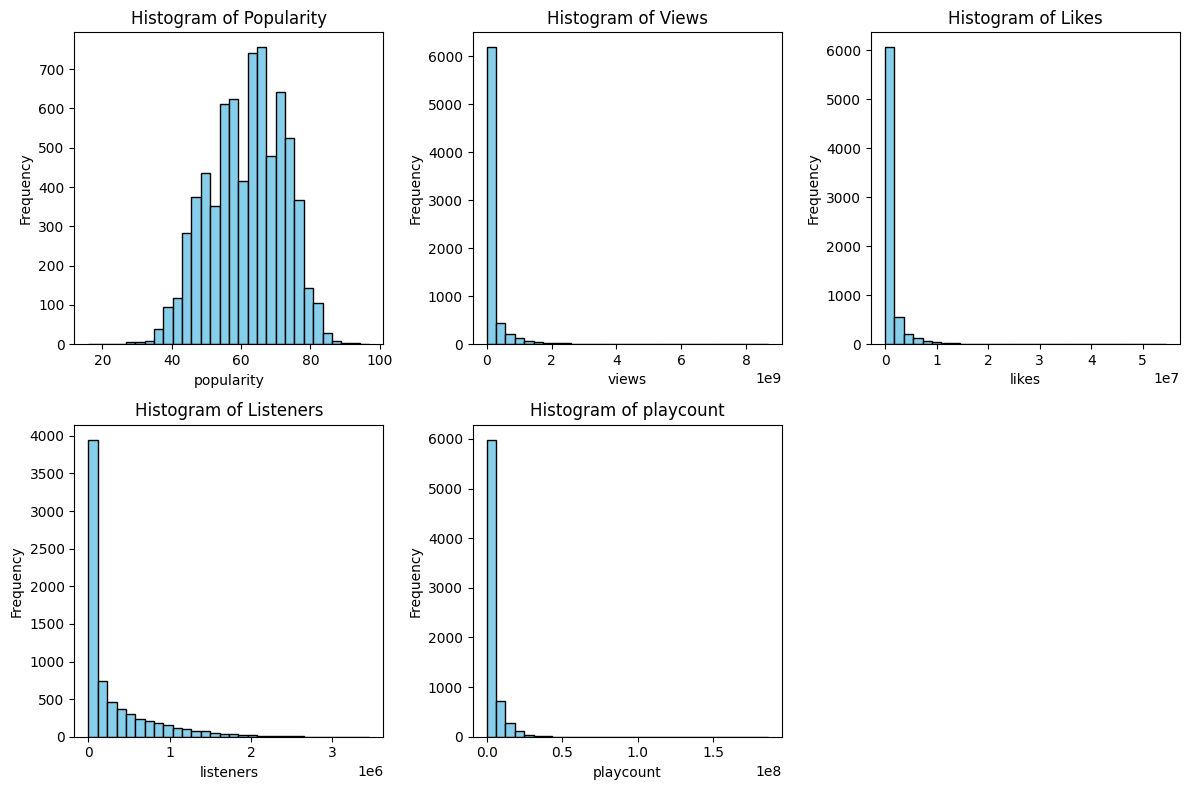

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
plt.hist(df['popularity'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.title('Histogram of Popularity')

plt.subplot(2,3,2)
plt.hist(df['view_count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('views')
plt.ylabel('Frequency')
plt.title('Histogram of Views')

plt.subplot(2,3,3)
plt.hist(df['like_count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('likes')
plt.ylabel('Frequency')
plt.title('Histogram of Likes')

plt.subplot(2,3,4)
plt.hist(df['listeners'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('listeners')
plt.ylabel('Frequency')
plt.title('Histogram of Listeners')

plt.subplot(2,3,5)
plt.hist(df['play_count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('playcount')
plt.ylabel('Frequency')
plt.title('Histogram of playcount')
# Display the plot
plt.tight_layout()
plt.show()

In [3]:
# Normalize data
import numpy as np
from sklearn.preprocessing import RobustScaler

def log_transform_and_robust_scale(data):
    # 1. Log Transformation (using log1p)
    log_transformed_data = np.log1p(data)

    # 2. Robust Scaling
    Ro_scaler = RobustScaler()
    scaled_data = Ro_scaler.fit_transform(log_transformed_data.values.reshape(-1, 1))

    return scaled_data

data = df.copy()
# Apply the function to each column
for col in ['listeners', 'play_count', 'popularity', 'view_count', 'like_count']:
    if col != 'popularity':
        data[col + '_scaled'] = log_transform_and_robust_scale(data[col])
    elif col == 'popularity':
        Z_scaler = StandardScaler()
        data[col + '_scaled'] = Z_scaler.fit_transform(data[col].values.reshape(-1, 1))

data.head(5)

,track_name,popularity,view_count,like_count,listeners,play_count,album,artists,release_year,release_month,release_day,listeners_scaled,play_count_scaled,popularity_scaled,view_count_scaled,like_count_scaled
0,When I'm With You,74,1356990,76411,41296,660264,DREAMSCAPE,NCT DREAM,2024,11.0,11.0,-0.122722,0.062632,1.167129,-0.692818,-0.230457
1,Moonlit Floor (Kiss Me),79,66200691,1310509,164108,2545493,Moonlit Floor (Kiss Me),LISA,2024,10.0,3.0,0.168388,0.316386,1.637807,0.323518,0.595644
2,Who,86,90380936,2662194,290397,118664117,MUSE,Jimin,2024,7.0,19.0,0.288803,1.038847,2.296756,0.404916,0.801654
3,New Woman (feat. ROSALÍA),77,142792624,3299299,13329,573805,New Woman (feat. ROSALÍA),"LISA, ROSALÍA",2024,8.0,15.0,-0.361302,0.036240,1.449536,0.524490,0.864021
4,Die With A Smile,97,749845365,8793461,35802,562233,Die With A Smile,"Lady Gaga, Bruno Mars",2024,8.0,16.0,-0.152842,0.032409,3.332248,0.958085,1.148967


In [4]:
cols = ['listeners_scaled', 'play_count_scaled', 'popularity_scaled', 'view_count_scaled', 'like_count_scaled']

# Standardize the data
scaler = StandardScaler()
scaled_data = data[cols]

# Apply PCA with n_components=1
pca = PCA(n_components=1)
pca.fit(scaled_data)

# Transform the data to the first principal component
trend_score = pca.transform(scaled_data)

# Add the trend score to the DataFrame
data['trend_score'] = trend_score

# Optional: Get the loadings (weights)
loadings = pca.components_[0]
print("Loadings (Weights):", loadings)

Loadings (Weights): [0.30500171 0.31894761 0.63906781 0.4400501  0.45077115]


In [5]:
top_50_trending_alltime = data.nlargest(100, 'trend_score')
top_50_trending_now = data.nlargest(100, 'popularity')
print('^ v ^')

^ v ^


In [6]:
year_count_1 = top_50_trending_now[['track_name','release_year','popularity']]['release_year'].value_counts()

In [7]:
year_count_2 = top_50_trending_alltime[['track_name','release_year','trend_score']]['release_year'].value_counts()

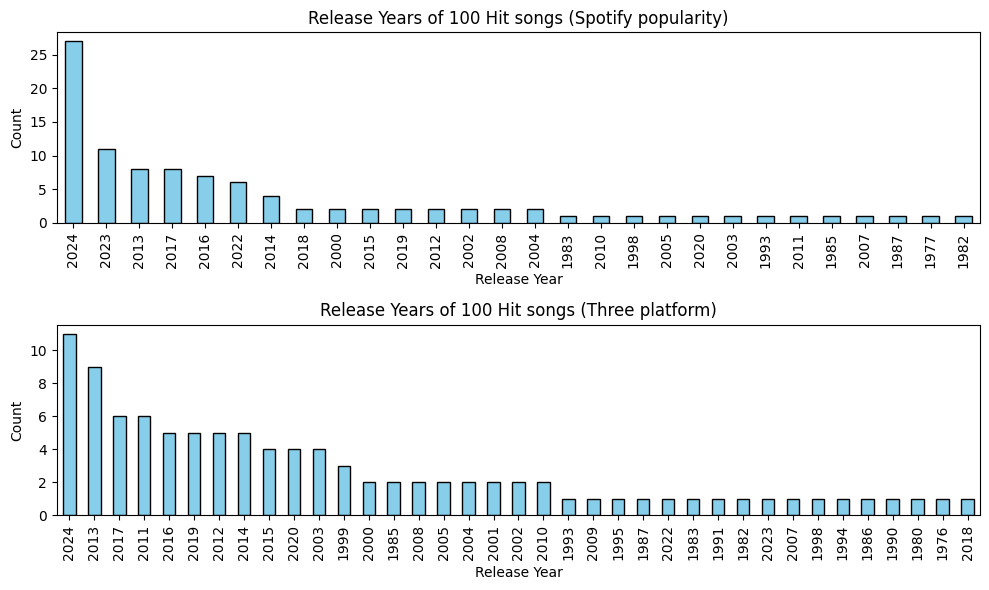

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
# year_count_1.sort_index().plot(kind='bar')
year_count_1.plot(kind='bar',color='skyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Years of 100 Hit songs (Spotify popularity)')

plt.subplot(2,1,2)
# year_count_2.sort_index().plot(kind='bar')
year_count_2.plot(kind='bar',color='skyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Years of 100 Hit songs (Three platform)')
plt.tight_layout()
plt.show()

In [49]:
top_50_trending_now[['track_name','release_year','popularity']].head(5)

,track_name,release_year,popularity
4,Die With A Smile,2024,97
5,BIRDS OF A FEATHER,2024,94
471,Not Like Us,2024,92
22,WILDFLOWER,2024,91
21,"Good Luck, Babe!",2024,90


In [50]:
top_50_trending_alltime[['track_name','release_year','trend_score']].head(5)

,track_name,release_year,trend_score
5,BIRDS OF A FEATHER,2024,3.254298
4,Die With A Smile,2024,3.201913
471,Not Like Us,2024,3.195764
34,Shape of You,2017,3.173450
13,That's What I Like,2016,3.089898
